In [23]:
import base
import distance
import greedy
import ioUtils
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('data/good_data.csv')
data.head()

,trajID,ts,lat,lon
0,4579,2008-02-02 13:52:05,116.41274,39.89784
1,4579,2008-02-02 13:53:05,116.41275,39.89794
2,4992,2008-02-02 13:58:32,116.51105,40.01203
3,4822,2008-02-02 14:23:08,116.40236,39.94834
4,4822,2008-02-02 14:24:09,116.40235,39.94832


In [3]:
count_ = data.groupby('trajID').size().reset_index(name='count').sort_values('count')
count_

,trajID,count
0,1063,9
1,1990,9
3,4712,9
5,4827,17
6,4992,19
7,5033,19
2,4579,23
4,4822,26


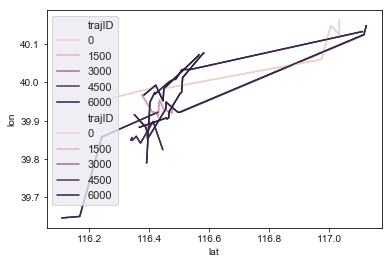

In [24]:
sns.lineplot(x='lat', y='lon', data=data, hue='trajID')
plt.show()

In [5]:
#data.to_csv('data/good.txt',index=False, header=None)

In [6]:
trajs = ioUtils.readTrajsFromTxtFile('data/good.txt')

In [7]:
rmin, rmax = 0.01, 1
print("Computing Frechet distances ...")
distPairs1 = distance.process(trajs, rmin, rmax)

Computing Frechet distances ...


In [8]:
distPairs1

{(<base.pathlet at 0xb557940>, <base.subTraj at 0xb565048>): 0,
 (<base.pathlet at 0xb557978>, <base.subTraj at 0xb557fd0>): 0,
 (<base.pathlet at 0xb557978>, <base.subTraj at 0xb5650f0>): 0.01,
 (<base.pathlet at 0xb5579b0>, <base.subTraj at 0xb557f98>): 0,
 (<base.pathlet at 0xb5579b0>, <base.subTraj at 0xb5651d0>): 0.01,
 (<base.pathlet at 0xb5579b0>, <base.subTraj at 0xb565208>): 0.01,
 (<base.pathlet at 0xb5579e8>, <base.subTraj at 0xb565080>): 0,
 (<base.pathlet at 0xb557a20>, <base.subTraj at 0xb5650b8>): 0,
 (<base.pathlet at 0xb557a20>, <base.subTraj at 0xb5652b0>): 0.01,
 (<base.pathlet at 0xb557a58>, <base.subTraj at 0xb565198>): 0,
 (<base.pathlet at 0xb557a90>, <base.subTraj at 0xb565240>): 0,
 (<base.pathlet at 0xb557a90>, <base.subTraj at 0xb565358>): 0.01,
 (<base.pathlet at 0xb557a90>, <base.subTraj at 0xb565390>): 0.01,
 (<base.pathlet at 0xb557ac8>, <base.subTraj at 0xb565278>): 0,
 (<base.pathlet at 0xb557ac8>, <base.subTraj at 0xb565400>): 0.01,
 (<base.pathlet at 

In [9]:
for k, v in distPairs1.items():
    print(k[0].trajID, k[0].bounds)
    print(k[1].trajID, k[1].bounds)
    print(v)
    print("-"*60)

4579 (0, 22)
4579 (0, 22)
0
------------------------------------------------------------
4579 (0, 11)
4579 (0, 11)
0
------------------------------------------------------------
4579 (0, 11)
4579 (0, 12)
0.01
------------------------------------------------------------
4579 (12, 22)
4579 (12, 22)
0
------------------------------------------------------------
4579 (12, 22)
4579 (2, 22)
0.01
------------------------------------------------------------
4579 (12, 22)
4579 (3, 22)
0.01
------------------------------------------------------------
4992 (0, 18)
4992 (0, 18)
0
------------------------------------------------------------
4992 (0, 9)
4992 (0, 9)
0
------------------------------------------------------------
4992 (0, 9)
4992 (0, 11)
0.01
------------------------------------------------------------
4822 (0, 25)
4822 (0, 25)
0
------------------------------------------------------------
4822 (0, 12)
4822 (0, 12)
0
------------------------------------------------------------
4822 (0,

1063 (0, 8)
0.32
------------------------------------------------------------
4822 (0, 12)
4712 (0, 8)
0.32
------------------------------------------------------------
4822 (0, 12)
4822 (0, 18)
0.32
------------------------------------------------------------
5033 (0, 18)
1063 (0, 8)
0.32
------------------------------------------------------------
5033 (0, 18)
4712 (0, 8)
0.32
------------------------------------------------------------
5033 (0, 18)
4822 (0, 18)
0.32
------------------------------------------------------------
5033 (0, 9)
1063 (0, 8)
0.32
------------------------------------------------------------
5033 (0, 9)
4712 (0, 8)
0.32
------------------------------------------------------------
5033 (0, 9)
4822 (0, 18)
0.32
------------------------------------------------------------
4579 (0, 22)
1063 (0, 8)
0.64
------------------------------------------------------------
4579 (0, 22)
4822 (0, 25)
0.64
------------------------------------------------------------
4579 (0, 22

In [10]:
distPairs2 = {}
for k, v in distPairs1.items():
    pth, trID, dist, straj = k[0], k[1].trajID, v, k[1]
    if (pth, trID) in distPairs2:
        distPairs2[(pth, trID)].append((straj, dist))
    else:
        distPairs2[(pth, trID)] = [(straj, dist)]

In [11]:
print("Computing prerequisite data structures for greedy algorithm ...")
(strajCov, ptStraj, strajPth, trajCov) = greedy.preprocessGreedy(trajs, distPairs2)

Computing prerequisite data structures for greedy algorithm ...


In [12]:
c1, c2, c3 = 1,1,1

print("Running greedy algorithm ...")
retVal = greedy.runGreedy(trajs, distPairs2, strajCov, ptStraj, strajPth, trajCov, c1, c2, c3)

Running greedy algorithm ...
num of points is 123
Error!! Coverage should have been 0, instead of 1
Error!! Coverage should have been 0, instead of 1
Error!! Coverage should have been 0, instead of 3
Error!! Coverage should have been 0, instead of 1
Error!! Coverage should have been 0, instead of 1
Error!! Coverage should have been 0, instead of 1
num of points is 26
Error!! Coverage should have been zero.
num of points is 23
Error!! Coverage should have been zero.
num of points is 23
Error!! Coverage should have been zero.
num of points is 23
Error!! Coverage should have been zero.
num of points is 23
Error!! Coverage should have been zero.
num of points is 18
num of points is 9
Error!! Coverage should have been zero.
num of points is 9


In [13]:
retVal

({<base.pathlet at 0xb557b38>: [<base.subTraj at 0xb565320>,
   <base.subTraj at 0xb55e4e0>]},
 [(<base.pathlet at 0xb557b38>, 67.3076923076923, 0, 5.590497737556561)],
  <base.pt at 0xb557748>])

In [14]:
count_

,trajID,count
0,1063,9
1,1990,9
3,4712,9
5,4827,17
6,4992,19
7,5033,19
2,4579,23
4,4822,26


In [15]:
for k,v in retVal[0].items():
    print("-"*60)
    print(k)
    #print(type(v))
    for x in v:
        print(x)
        print(x.bounds)

------------------------------------------------------------
Pathlet TrajID 5033 ; bounds (0, 18)
Subtraj TrajID 5033 ; bounds (0, 18)
(0, 18)
Subtraj TrajID 4822 ; bounds (0, 22)
(0, 22)
Subtraj TrajID 4992 ; bounds (0, 18)
(0, 18)
Subtraj TrajID 1990 ; bounds (0, 8)
(0, 8)
Subtraj TrajID 4827 ; bounds (0, 11)
(0, 11)
Subtraj TrajID 4579 ; bounds (0, 22)
(0, 22)


In [16]:
list_poly = []
for k, v  in retVal[0].items():
    list_df = []
    print("-"*60)
    #print(k)
    for x in v:
        list_trID = []
        list_lat = []
        list_lon = []
        trID = x.trajID
        print(trID)
        print(x.bounds)
        list_lat = [x.lat for x in trajs[trID].pts[x.bounds[0]:x.bounds[1]]]
        list_lon = [x.lon for x in trajs[trID].pts[x.bounds[0]:x.bounds[1]]]
        list_trID.extend([trID]*len(list_lat))
        print(len(list_lat), len(list_trID))
        df = pd.DataFrame({
            'trajID': list_trID,
            'lat': list_lat,
            'lon': list_lon
        })
        list_df.append(df)
    poly = pd.concat(list_df, ignore_index=True)
    list_poly.append(poly)

------------------------------------------------------------
5033
(0, 18)
18 18
4822
(0, 22)
22 22
4992
(0, 18)
18 18
1990
(0, 8)
8 8
4827
(0, 11)
11 11
4579
(0, 22)
22 22


In [17]:
len(list_poly)

1

In [71]:
data['trID'] = 't' + data['trajID'].apply(str)

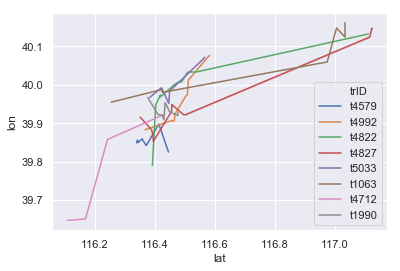

In [72]:
sns.lineplot(x='lat', y='lon', data=data, hue='trID')
plt.show()

In [73]:
df['trID'] = 't' + df['trajID'].apply(str)

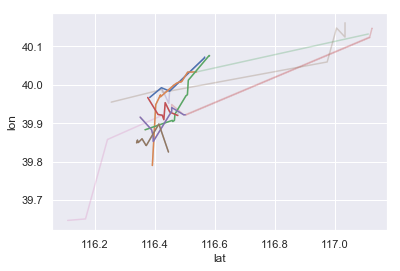

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)
p1 = sns.lineplot(x='lat', y='lon', data=data, hue='trID', alpha=0.3, ax=ax)
p2 = sns.lineplot(x='lat', y='lon', data=df, hue='trID',  markers=True, ax=ax)
p2.legend_.remove()
plt.show()

In [48]:
 polygon = Polygon(np.random.rand(N, 2), True)

In [50]:
np.random.rand(N, 2)

array([[0.9394465 , 0.14938344],
       [0.10613053, 0.1130214 ],
       [0.0172881 , 0.92499563],
       [0.84654825, 0.15087418],
       [0.55445251, 0.79693687],
       [0.29996092, 0.19895712],
       [0.34327569, 0.10901783],
       [0.1223245 , 0.50658646],
       [0.59378882, 0.92553342],
       [0.79027613, 0.58191591]])

In [52]:
df[['lat', 'lon']].values

array([[116.44854,  39.98349],
       [116.44856,  39.98348],
       [116.44856,  39.98349],
       [116.44856,  39.98348],
       [116.44856,  39.98349],
       [116.44856,  39.98349],
       [116.44856,  39.9835 ],
       [116.44856,  39.9835 ],
       [116.44856,  39.9835 ],
       [116.4486 ,  39.9835 ],
       [116.44861,  39.98351],
       [116.44861,  39.98351],
       [116.56535,  40.07199],
       [116.56537,  40.07207],
       [116.38227,  39.96707],
       [116.56491,  40.07027],
       [116.56491,  40.07027],
       [116.42141,  39.99241],
       [116.40236,  39.94834],
       [116.40235,  39.94832],
       [116.41818,  39.97373],
       [116.41843,  39.96879],
       [116.41843,  39.96879],
       [116.46485,  40.00058],
       [116.471  ,  40.00378],
       [116.49017,  40.01001],
       [116.49017,  40.01002],
       [116.4902 ,  40.01   ],
       [116.46589,  40.0005 ],
       [116.48605,  40.0083 ],
       [116.48632,  40.00707],
       [116.48269,  40.00791],
       [

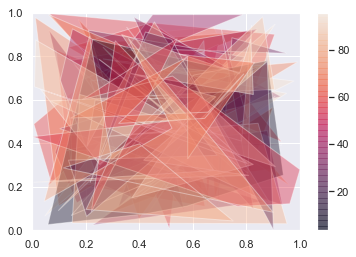

In [59]:
fig, ax = plt.subplots()
for i in range(5):
    polygon = Polygon(np.random.rand(N, 2), True)
    patches.append(polygon)

colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))
ax.add_collection(p)
fig.colorbar(p, ax=ax)
plt.show()

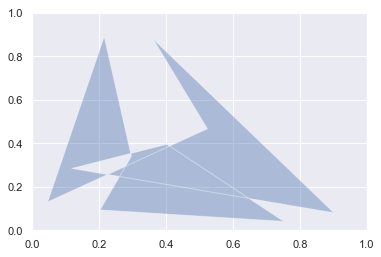

In [67]:
from matplotlib.patches import Circle, Wedge, Polygon
patches = []
fig, ax = plt.subplots()
Polygon(df[['lat', 'lon']].values, True)
patches.append(polygon)
p = PatchCollection(patches, alpha=0.4)
#p.set_array(np.array(colors))
ax.add_collection(p)
#fig.colorbar(p, ax=ax)
plt.show()

In [45]:
patches

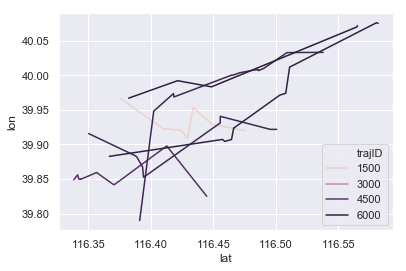

In [29]:
sns.lineplot(x='lat', y='lon', data=list_poly[0], hue='trajID')
plt.show()

In [20]:
df = list_poly[0]


In [21]:
import geopandas
from shapely.geometry import Point

ImportError: DLL load failed: The specified module could not be found.